#Integrantes do Grupo
Agatha Quadros

Bernardo Petry Salvador

Pedro Gustavo Lopes Thomas

Victor Carpegiani



# Problema do Caixeiro viajante
O problema do Caixeiro viajante (Traveling Salesman Problem) é um problema famoso que simula o trajeto de um comerciante por várias cidades antes de retornar à cidade origem.

O problema do caixeiro viajante exige que calculemos o melhor trajeto para percorrer uma lista de cidades de uma instância. Para isso, criaremos um dicionário para cada instância do problema, contendo o índice da lista e as coordenadas x e y.

# Análise do problema
O problema do caixeiro viajante se trata de um problema totalmente observável, sequencial, monoagente, determinístico, estático, discreto e conhecido. Possui um grande número de soluções possíveis, e para achar a melhor, utilizaremos um algoritmo genético, cuja abstração pode ser representado pelo pseudocódigo abaixo (RUSSEL; NORVIG, 2022, p. 106) :

```
função ALGORITMO-GENÉTICO(população, adapta) retorna um indivíduo
repita
  pesos ← PESADO-POR(população, adapta)
  população2 ← lista vazia
  para i = 1 até TAMANHO(população) faça
    pai1, pai2 ← SELEÇÃO-ALEATÓRIA(população, pesos, 2)
    filho ← REPRODUZ(pai1, pai2)
    se (pequena probabilidade aleatória) então filho ← MUTAÇÃO(filho)
    adicionar filho à população2
  população ← população2
até um indivíduo estar adaptado o bastante ou até ter decorrido tempo suficiente
retornar o melhor indivíduo em população, de acordo com adapta

```

```
função REPRODUZ(pai1, pai2) retorna um indivíduo
n ← COMPRIMENTO(pai1)
c ← número aleatório de 1 a n
retornar CONCATENA(SUBCADEIA(pai1,1,c), SUBCADEIA(pai2,c + 1,n))
```





# Declaração Matemática do problema


Considerando que é um problema de otimização combinatória que busca encontrar a rota mais curta que visita todas as cidades de um conjunto:
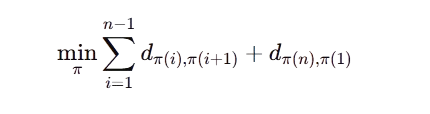




**π**: Uma permutação das cidades, ou seja, uma ordem de visita. Por exemplo, se temos 4 cidades,
π=(2,3,1,4) indica que a ordem de visita será cidade 2 → 3 → 1 → 4.

**d*𝑖𝑗***  : A distância entre as cidades i e j.

**n-1
∑
i = 1 d
π(i),π(i+1)**
 ​: Soma as distâncias entre cada cidade e a próxima na permutação menos do fim para o inicio


 **𝜋
(
𝑖
)
π(i)**: A cidade na posição
𝑖
i da permutação.

 **+d
π(n),π(1)**
​
 : adiciona a distância do último ponto de volta ao primeiro, formando um ciclo fechado.

 Exemplo: Se temos 4 cidades em um conjunto (1,3,4,2)

 O caminho será  1 --> 3 --> 4 --> 2

E o custo total será d *1,3* +d *3,4*​+d *4,2*+d *2,1*
​




# Espaço de busca
O espaço de busca é o conjunto de todas as permutações possíveis de n cidades, ou seja:

∣S∣ = n!

Utilizando o exemplo da instancia de "Berlin52", temos um percurso de 52!, que resulta em aproximadamente **8,07 × 10⁶⁷**

O tamanho de tal espaço de busca é o motivo pelo qual técnicas exatas se tornam inviáveis, e técnicas heurísticas são recomendadas.


# Codificação da Solução

Cada indivíduo da população representa uma solução possível para o problema, ou seja, uma permutação das cidades.

Formalmente, um inviduo é um vetor π = [π1, π2, π3...πn] onde πi ∈ {1,2,...,n} e todos os πi são distintos

# Declaração das instâncias do problema:

In [143]:
import pandas as pd
import numpy as np
from google.colab import drive


#Lê e converte linhas dos arquivos em dicionários através da biblioteca pandas
berlin52_df = pd.read_csv("berlin52.txt", sep=" ", header=None, names=["id", "x", "y"], on_bad_lines='skip')
berlin52_dict = berlin52_df.set_index("id").to_dict(orient="index")

eil51_df = pd.read_csv("eil51.txt", sep=" ", header=None, names=["id", "x", "y"], on_bad_lines='skip')
eil51_dict = eil51_df.set_index("id").to_dict(orient="index")

pr152_df = pd.read_csv("pr152.txt", sep=" ", header=None, names=["id", "x", "y"], on_bad_lines='skip')
pr152_dict = pr152_df.set_index("id").to_dict(orient="index")

rat99_df = pd.read_csv("rat99.txt", sep=" ", header=None, names=["id", "x", "y"], on_bad_lines='skip')
rat99_dict = rat99_df.set_index("id").to_dict(orient="index")

#Exibição dos dicinários

print(berlin52_dict)
print(eil51_dict)
print(pr152_dict)
print(rat99_dict)





{1: {'x': 565.0, 'y': 575.0}, 2: {'x': 25.0, 'y': 185.0}, 3: {'x': 345.0, 'y': 750.0}, 4: {'x': 945.0, 'y': 685.0}, 5: {'x': 845.0, 'y': 655.0}, 6: {'x': 880.0, 'y': 660.0}, 7: {'x': 25.0, 'y': 230.0}, 8: {'x': 525.0, 'y': 1000.0}, 9: {'x': 580.0, 'y': 1175.0}, 10: {'x': 650.0, 'y': 1130.0}, 12: {'x': 1220.0, 'y': 580.0}, 13: {'x': 1465.0, 'y': 200.0}, 14: {'x': 1530.0, 'y': 5.0}, 15: {'x': 845.0, 'y': 680.0}, 16: {'x': 725.0, 'y': 370.0}, 17: {'x': 145.0, 'y': 665.0}, 18: {'x': 415.0, 'y': 635.0}, 20: {'x': 560.0, 'y': 365.0}, 21: {'x': 300.0, 'y': 465.0}, 22: {'x': 520.0, 'y': 585.0}, 23: {'x': 480.0, 'y': 415.0}, 24: {'x': 835.0, 'y': 625.0}, 25: {'x': 975.0, 'y': 580.0}, 26: {'x': 1215.0, 'y': 245.0}, 27: {'x': 1320.0, 'y': 315.0}, 28: {'x': 1250.0, 'y': 400.0}, 29: {'x': 660.0, 'y': 180.0}, 30: {'x': 410.0, 'y': 250.0}, 31: {'x': 420.0, 'y': 555.0}, 32: {'x': 575.0, 'y': 665.0}, 33: {'x': 1150.0, 'y': 1160.0}, 34: {'x': 700.0, 'y': 580.0}, 35: {'x': 685.0, 'y': 595.0}, 36: {'x': 6



```
# Isto está formatado como código
```

#Criação da matriz de distâncias
Criaremos uma matriz de distâncias com a dimensão equivalente ao número total de cidades da instância. Também, declaramos a função para calcular a distância euclidiana entre duas cidades, que será usada na classe que calcula a aptidão da solução.


In [144]:
# Criar a matriz de distâncias de Berlin
num_cities = len(berlin52_dict)
distance_matrix = np.zeros((num_cities, num_cities))
city_ids = list(berlin52_dict.keys())

#Valores possíveis
possible_values = num_cities

# Função para calcular a distância Euclidiana entre duas cidades
def euclidean_distance(city1, city2):
    return np.sqrt((city1["x"] - city2["x"])**2 + (city1["y"] - city2["y"])**2)



#Cálculo da aptidão

Criaremos a classe EvaluationRoads, que percorrerá a matriz de cidades e aplicará o cálculo da distância eucludiana entre as coordenadas entre os elementos, com o objetivo de calcular a aptidão (fitness) da solução.

In [145]:
class EvaluationRoads:
  # armazena instância do problema na inicialização
    def __init__(self, n):
        self.n = n
  #Calcula valor da solução:
    def __call__(self, solution):
      total_distance = 0;

      for i in range(num_cities):
        for j in range(num_cities):
          if i != j:
            distance_matrix[i, j] = euclidean_distance(berlin52_dict[city_ids[i]], berlin52_dict[city_ids[j]])
            total_distance += distance_matrix[i, j]

      return total_distance



Considerando que a função objetivo avalia a qualidade (aptidão) de uma solução, para calcular a distância total do percurso, se utiliza a mesma função mencionada anteriormente:
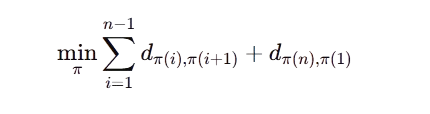




Algoritimo do Vizinho mais Proximo

In [146]:

# Algoritmo do Vizinho Mais Próximo (NN)
def nearest_neighbor_tsp(distance_matrix):
    num_cities = len(distance_matrix)
    visited = [False] * num_cities
    tour = [0]  # Começamos pela primeira cidade (índice 0)
    visited[0] = True
    total_distance = 0

    for _ in range(num_cities - 1):
        last_city = tour[-1]
        nearest_city = None
        min_distance = float("inf")

        for i in range(num_cities):
            if not visited[i] and distance_matrix[last_city, i] < min_distance:
                min_distance = distance_matrix[last_city, i]
                nearest_city = i

        tour.append(nearest_city)
        visited[nearest_city] = True
        total_distance += min_distance

    # Retorna à cidade inicial
    total_distance += distance_matrix[tour[-1], tour[0]]
    tour.append(tour[0])

    return tour, total_distance

# Executar o algoritmo NN para Berlin52
tour, total_distance = nearest_neighbor_tsp(distance_matrix)

# Exibir o resultado
print("Ordem das cidades visitadas:", [city_ids[i] for i in tour])
print("Distância total do percurso:", total_distance)


Ordem das cidades visitadas: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 1]
Distância total do percurso: 0.0


# Aplicação do Algoritimo Genético

Tendo como exemplo as instancias de "berlin52"


Declaração das Instancias:


Estado de Seleção por roleta:

In [147]:
def select_tournament(pop_size, population, fitness_fn, k=3):
    selected = []
    for _ in range(pop_size):
        # Seleciona k indivíduos aleatoriamente da população
        tournament = random.sample(population, k)
        # Seleciona o indivíduo com o melhor fitness do torneio
        best_individual = max(tournament, key=fitness_fn)  # Buscando MAX, já que quanto menor o denominador, maior o retorno da fitness
        selected.append(best_individual)
    return selected


Estado de Cruzamento:

In [156]:
def order_crossover(parent1, parent2,num_cities):
    # Garante que só existam 10 genes (sem cidade duplicada no final)
    if parent1[0] == parent1[-1]:
        parent1 = parent1[:-1]
    if parent2[0] == parent2[-1]:
        parent2 = parent2[:-1]

    n = num_cities + 1  # Tamanho fixo de genes para evitar index out of range
    a, b = sorted(random.sample(range(n), 2))
    child = [None] * n

    # Copia fatia do primeiro pai
    child[a:b] = parent1[a:b]

    # Preenche os espaços vazios com genes do segundo pai
    p2_genes = [gene for gene in parent2 if gene not in child]

    idx = 0
    for i in range(n-1):
        if child[i] is None:
            child[i] = p2_genes[idx]
            idx += 1

    # Retorna à cidade inicial no final
    child = [gene for gene in child if gene is not None]

    child.append(child[0])
    return child



Estado de Mutação

In [149]:
def mutate_inversion(individual, pmut):
    if random.random() < pmut:
        i, j = sorted(random.sample(range(len(individual)), 2))
        individual[i:j] = reversed(individual[i:j])
    return individual


Aplicação:

#Instância Berlin52

In [157]:
import random
import math
import bisect
import pandas as pd

#Declaração de Instancias


berlin52_df = pd.read_csv("berlin52.txt", sep=" ", header=None, names=["id", "x", "y"], on_bad_lines='skip')
berlin52_dict = berlin52_df.set_index("id").to_dict(orient="index")

#Função para calcular distância euclidiana entre cidades
def dist(a, b):
    return math.hypot(a[0] - b[0], a[1] - b[1])

#Função para calcular distância total de um caminho
def total_distance(route):
    return sum(
        dist(
            (berlin52_dict[route[i]]['x'], berlin52_dict[route[i]]['y']),
            (berlin52_dict[route[i+1]]['x'], berlin52_dict[route[i+1]]['y'])
        )
        for i in range(len(route)-1)
    ) + dist(
        (berlin52_dict[route[-1]]['x'], berlin52_dict[route[-1]]['y']),
        (berlin52_dict[route[0]]['x'], berlin52_dict[route[0]]['y'])
    )

#Função de fitness: quanto menor a distância, maior o fitness
def fitness(route):
    return 1 / (total_distance(route))

#Gerar população inicial
def init_population(size, city_ids):
    return [random.sample(city_ids, len(city_ids)) for _ in range(size)]

#Parâmetros
POP_SIZE = 1000
GENERATIONS = 500
PMUT = 0.1
city_ids = list(berlin52_dict.keys())
NUM_CITIES = len(city_ids)
population = init_population(POP_SIZE, city_ids)


#Loop evolutivo
for generation in range(GENERATIONS):
    # Seleção (torneio)
    selected = select_tournament(POP_SIZE, population, fitness)

    # Cruzamento (ponto único)
    offspring = []
    for i in range(0, POP_SIZE, 2):
        p1, p2 = selected[i], selected[i+1]
        child1 = order_crossover(p1, p2,NUM_CITIES)
        child2 = order_crossover(p2, p1, NUM_CITIES)

        offspring.extend([child1, child2])

    # Mutação (uniforme)
    gene_pool = city_ids.copy()

    mutated = [mutate_inversion(ind, PMUT) for ind in offspring]

    # Substituição direta
    population = mutated

#Melhor indivíduo final

#elitismo
elite = min(population, key=total_distance)
population[0] = elite  # substitui o primeiro pela elite
best = population[0]

print("Melhor rota:", best)
print("Distância:", total_distance(best))


Melhor rota: [29, 30, 2, 7, 42, 21, 17, 3, 18, 31, 23, 20, 50, 16, 44, 1, 22, 49, 32, 45, 41, 8, 9, 10, 36, 35, 34, 39, 40, 38, 37, 46, 48, 24, 5, 15, 6, 25, 4, 43, 33, 51, 12, 28, 26, 27, 13, 52, 14, 47, 29]
Distância: 8041.017161943788


#Instância Eil51

In [165]:
#Declaração de Instancias


eil51_df = pd.read_csv("eil51.txt", sep=" ", header=None, names=["id", "x", "y"], on_bad_lines='skip')
eil51_dict = eil51_df.set_index("id").to_dict(orient="index")

#Função para calcular distância euclidiana entre cidades
def dist(a, b):
    return math.hypot(a[0] - b[0], a[1] - b[1])

#Função para calcular distância total de um caminho
def total_distance(route):
    return sum(
        dist(
            (eil51_dict[route[i]]['x'], eil51_dict[route[i]]['y']),
            (eil51_dict[route[i+1]]['x'], eil51_dict[route[i+1]]['y'])
        )
        for i in range(len(route)-1)
    ) + dist(
        (eil51_dict[route[-1]]['x'], eil51_dict[route[-1]]['y']),
        (eil51_dict[route[0]]['x'], eil51_dict[route[0]]['y'])
    )

#Função de fitness: quanto menor a distância, maior o fitness
def fitness(route):
    return 1 / (total_distance(route))

#Gerar população inicial
def init_population(size, city_ids):
    return [random.sample(city_ids, len(city_ids)) for _ in range(size)]

#Parâmetros
POP_SIZE = 1000
GENERATIONS = 500
PMUT = 0.1
city_ids = list(eil51_dict.keys())
NUM_CITIES = len(city_ids)
population = init_population(POP_SIZE, city_ids)


#Loop evolutivo
for generation in range(GENERATIONS):
    # Seleção (torneio)
    selected = select_tournament(POP_SIZE, population, fitness)

    # Cruzamento (ponto único)
    offspring = []
    for i in range(0, POP_SIZE, 2):
        p1, p2 = selected[i], selected[i+1]
        child1 = order_crossover(p1, p2,NUM_CITIES)
        child2 = order_crossover(p2, p1, NUM_CITIES)

        offspring.extend([child1, child2])

    # Mutação (uniforme)
    gene_pool = city_ids.copy()

    mutated = [mutate_inversion(ind, PMUT) for ind in offspring]

    # Substituição direta
    population = mutated

#Melhor indivíduo final

#elitismo
elite = min(population, key=total_distance)
population[0] = elite  # substitui o primeiro pela elite
best = population[0]

print("Melhor rota:", best)
print("Distância:", total_distance(best))

Melhor rota: [4, 17, 37, 15, 33, 45, 44, 42, 19, 40, 41, 13, 25, 14, 18, 47, 12, 46, 51, 6, 23, 24, 43, 7, 26, 8, 48, 27, 32, 1, 22, 31, 28, 3, 36, 35, 20, 2, 29, 21, 16, 50, 34, 30, 39, 10, 49, 9, 38, 11, 5, 4]
Distância: 459.93129935289824


#Instância Pr152

In [161]:
#Declaração de Instancias


pr152_df = pd.read_csv("pr152.txt", sep=" ", header=None, names=["id", "x", "y"], on_bad_lines='skip')
pr152_dict = pr152_df.set_index("id").to_dict(orient="index")

#Função para calcular distância euclidiana entre cidades
def dist(a, b):
    return math.hypot(a[0] - b[0], a[1] - b[1])

#Função para calcular distância total de um caminho
def total_distance(route):
    return sum(
        dist(
            (pr152_dict[route[i]]['x'], pr152_dict[route[i]]['y']),
            (pr152_dict[route[i+1]]['x'], pr152_dict[route[i+1]]['y'])
        )
        for i in range(len(route)-1)
    ) + dist(
        (pr152_dict[route[-1]]['x'], pr152_dict[route[-1]]['y']),
        (pr152_dict[route[0]]['x'], pr152_dict[route[0]]['y'])
    )

#Função de fitness: quanto menor a distância, maior o fitness
def fitness(route):
    return 1 / (total_distance(route))

#Gerar população inicial
def init_population(size, city_ids):
    return [random.sample(city_ids, len(city_ids)) for _ in range(size)]

#Parâmetros
POP_SIZE = 1000
GENERATIONS = 500
PMUT = 0.1
city_ids = list(pr152_dict.keys())
NUM_CITIES = len(city_ids)
population = init_population(POP_SIZE, city_ids)


#Loop evolutivo
for generation in range(GENERATIONS):
    # Seleção (torneio)
    selected = select_tournament(POP_SIZE, population, fitness)

    # Cruzamento (ponto único)
    offspring = []
    for i in range(0, POP_SIZE, 2):
        p1, p2 = selected[i], selected[i+1]
        child1 = order_crossover(p1, p2,NUM_CITIES)
        child2 = order_crossover(p2, p1, NUM_CITIES)

        offspring.extend([child1, child2])

    # Mutação (uniforme)
    gene_pool = city_ids.copy()

    mutated = [mutate_inversion(ind, PMUT) for ind in offspring]

    # Substituição direta
    population = mutated

#Melhor indivíduo final

#elitismo
elite = min(population, key=total_distance)
population[0] = elite  # substitui o primeiro pela elite
best = population[0]

print("Melhor rota:", best)
print("Distância:", total_distance(best))

Melhor rota: [111, 48, 132, 71, 130, 149, 78, 92, 6, 39, 112, 85, 143, 91, 147, 129, 145, 136, 141, 118, 126, 127, 96, 26, 36, 35, 32, 63, 134, 99, 70, 146, 119, 121, 133, 148, 54, 47, 137, 114, 74, 86, 58, 152, 123, 125, 151, 94, 101, 104, 38, 11, 109, 22, 7, 97, 81, 103, 53, 33, 37, 76, 31, 15, 34, 14, 28, 27, 106, 60, 64, 90, 62, 89, 79, 77, 49, 95, 23, 4, 13, 40, 8, 18, 75, 116, 50, 87, 51, 72, 73, 80, 98, 100, 69, 45, 46, 115, 144, 138, 117, 140, 139, 142, 105, 135, 120, 24, 5, 25, 19, 67, 65, 55, 56, 43, 102, 88, 110, 3, 12, 17, 20, 84, 42, 57, 1, 2, 30, 9, 29, 21, 68, 107, 59, 61, 83, 10, 44, 131, 128, 150, 124, 122, 16, 66, 52, 113, 82, 108, 41, 93, 111]
Distância: 574236.5531187591


#Instância Rat99

In [163]:
#Declaração de Instancias


rat99_df = pd.read_csv("rat99.txt", sep=" ", header=None, names=["id", "x", "y"], on_bad_lines='skip')
rat99_dict = rat99_df.set_index("id").to_dict(orient="index")

#Função para calcular distância euclidiana entre cidades
def dist(a, b):
    return math.hypot(a[0] - b[0], a[1] - b[1])

#Função para calcular distância total de um caminho
def total_distance(route):
    return sum(
        dist(
            (rat99_dict[route[i]]['x'], rat99_dict[route[i]]['y']),
            (rat99_dict[route[i+1]]['x'], rat99_dict[route[i+1]]['y'])
        )
        for i in range(len(route)-1)
    ) + dist(
        (rat99_dict[route[-1]]['x'], rat99_dict[route[-1]]['y']),
        (rat99_dict[route[0]]['x'], rat99_dict[route[0]]['y'])
    )

#Função de fitness: quanto menor a distância, maior o fitness
def fitness(route):
    return 1 / (total_distance(route))

#Gerar população inicial
def init_population(size, city_ids):
    return [random.sample(city_ids, len(city_ids)) for _ in range(size)]

#Parâmetros
POP_SIZE = 1000
GENERATIONS = 500
PMUT = 0.1
city_ids = list(rat99_dict.keys())
NUM_CITIES = len(city_ids)
population = init_population(POP_SIZE, city_ids)


#Loop evolutivo
for generation in range(GENERATIONS):
    # Seleção (torneio)
    selected = select_tournament(POP_SIZE, population, fitness)

    # Cruzamento (ponto único)
    offspring = []
    for i in range(0, POP_SIZE, 2):
        p1, p2 = selected[i], selected[i+1]
        child1 = order_crossover(p1, p2,NUM_CITIES)
        child2 = order_crossover(p2, p1, NUM_CITIES)

        offspring.extend([child1, child2])

    # Mutação (uniforme)
    gene_pool = city_ids.copy()

    mutated = [mutate_inversion(ind, PMUT) for ind in offspring]

    # Substituição direta
    population = mutated

#Melhor indivíduo final

#elitismo
elite = min(population, key=total_distance)
population[0] = elite  # substitui o primeiro pela elite
best = population[0]

print("Melhor rota:", best)
print("Distância:", total_distance(best))

Melhor rota: [61, 66, 67, 81, 70, 65, 57, 60, 75, 95, 86, 92, 87, 89, 98, 96, 94, 91, 85, 68, 88, 99, 71, 58, 29, 46, 55, 74, 83, 73, 39, 79, 90, 40, 56, 80, 72, 8, 53, 54, 93, 64, 82, 76, 62, 52, 13, 63, 45, 50, 77, 51, 38, 15, 30, 48, 49, 33, 36, 59, 69, 35, 24, 32, 31, 28, 4, 43, 44, 6, 7, 9, 18, 17, 27, 34, 26, 16, 25, 22, 21, 23, 20, 3, 12, 19, 47, 41, 5, 1, 2, 10, 14, 11, 37, 78, 97, 84, 42, 61]
Distância: 4220.427573918614
